In [3]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from tqdm.notebook import tnrange,tqdm
import pandas as pd
import os

In [4]:
from diffusion_simulation import diffusion_simulation
from network import network

In [3]:
def print_metrics(sim_id):
    params = {'sim_id':sim_id, 'alpha':0.1, 'beta':3.5,
          'noise_dist': 'logistic', 'noise_dist_param': 1,
          'cnt_iter': 100000, 't_warmup':1000, 'is_traj':False, 
          'is_network_given':True, 'network_dir':f'../instances/{sim_id}/edge.csv',  
          'is_value_given':True, 'value_dir':f'../instances/{sim_id}/v.csv'
         }
    G = network(params)
    G.cal_mean_inv_indeg()
    pd.DataFrame({'n':[G.n], 'd_min':[np.min(G.in_degree)], 'd_max':[np.max(G.in_degree)], 
                 'd_mean':[np.mean(G.in_degree)], 'out_in_ratio': [np.max(G.out_degree)/max(np.min(G.in_degree),1)], 
                 'deg_corr':[np.corrcoef(G.in_degree, G.out_degree)[0,1]],
                 'inv_ind_density':[G.ave_inv_indeg]}
                ).to_csv(f'../instances/{sim_id}/metrics.csv', index=None)

In [14]:
def print_metrics_no0(sim_id):
    params = {'sim_id':sim_id, 'alpha':0.1, 'beta':3.5,
          'noise_dist': 'logistic', 'noise_dist_param': 1,
          'cnt_iter': 100000, 't_warmup':1000, 'is_traj':False, 
          'is_network_given':True, 'network_dir':f'../instances/{sim_id}/edge.csv',  
          'is_value_given':True, 'value_dir':f'../instances/{sim_id}/v.csv'
         }
    G = network(params)

    df = pd.read_csv(f'../instances/{sim_id}/results.csv')
    is_not_0 = G.in_degree > 0

    if G.n<len(df):
        df = df[:G.n]
    df_1 = df[is_not_0]
    mape = np.mean(np.abs(df_1['sim']-df_1['fp'])/df_1['sim'])
    
    G.cal_mean_inv_indeg()
    pd.DataFrame({'n':[G.n], 'd_mean':[np.mean(G.in_degree)], 'inv_ind_density':[np.mean(1/G.in_degree[is_not_0])], 
                  'mape':[mape]}
                ).to_csv(f'../instances/{sim_id}/metrics_no0.csv', index=None)

In [16]:
l_p = ['1_n11', '1_n', '1', 'logn2_n']
l_n = [20,50,100,200,500,1000,2000,5000,10000]

# l_p = ['1_n13', 'logn_n', 'sqrtlogn_n']
# l_n = [1000]
for p in l_p:
    for n in l_n:
        for cnt in range(1,51):
            print_metrics_no0(f'ER_{p}/n{n}_{cnt}')

Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 19 nodes.
Instance generated with 17 nodes.
Instance generated with 20 nodes.
Instance generated with 19 nodes.
Instance generated with 20 nodes.
Instance generated with 19 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 19 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 14 nodes.
Instance generated with 19 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance gener

Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated with 100 nodes.
Instance generated w

Instance generated with 2000 nodes.
Instance generated with 2000 nodes.
Instance generated with 2000 nodes.
Instance generated with 2000 nodes.
Instance generated with 2000 nodes.
Instance generated with 2000 nodes.
Instance generated with 2000 nodes.
Instance generated with 2000 nodes.
Instance generated with 2000 nodes.
Instance generated with 2000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000 nodes.
Instance generated with 5000

In [101]:
l_p = ['1_n11', '1_n', '1', 'logn2_n']
l_n = [20,50,100,200,500,1000,2000,5000,10000]

# l_p = ['1_n13', 'logn_n', 'sqrtlogn_n']
# l_n = [1000]
for p in l_p:
    rec_mape, rec_inv_deg = [], []
    for n in l_n:
        mape, inv_deg = [], []
        for cnt in range(1,51):
            df = pd.read_csv(f'../instances/ER_{p}/n{n}_{cnt}/metrics_no0.csv')
            mape.append(df['mape'].values[0]*100)
            inv_deg.append(df['inv_ind_density'].values[0])
        rec_mape.append(mape)
        rec_inv_deg.append(inv_deg)

In [113]:
l_p = ['1_n13', '1_n11', '1_n', 'sqrtlogn_n', 'logn_n', 'logn2_n', '1']
n = 1000
rec_mape, rec_inv_deg = [], []
for p in l_p:
    mape, inv_deg = [], []
    for cnt in range(1,51):
        df = pd.read_csv(f'../instances/ER_{p}/n{n}_{cnt}/metrics_no0.csv')
        mape.append(df['mape'].values[0]*100)
        inv_deg.append(df['inv_ind_density'].values[0])
    rec_mape.append(mape)
    rec_inv_deg.append(inv_deg)

In [7]:
df = pd.read_csv(f'../instances/ER_1/n100_1/metrics.csv')
df

,n,d_min,d_max,d_mean,out_in_ratio,deg_corr,inv_ind_density
0,100,4.0,18.0,9.73,4.25,-0.066502,0.112877


In [3]:
def extract_size_info(l_n, p):
    df_MAPE, df_inv_indeg, df_indeg = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    for n in l_n:
        l_MAPE, l_inv_indeg, l_indeg = [],[],[]
        for cnt in range(1,51):
            df = pd.read_csv(f'../instances/ER_{p}/n{n}_{cnt}/results.csv')
            MAPE = np.mean(abs(df['sim']-df['fp'])/df['sim'])*100
            l_MAPE.append(MAPE)
            
            df = pd.read_csv(f'../instances/ER_{p}/n{n}_{cnt}/metrics.csv')
            l_inv_indeg.append(df['inv_ind_density'].values[0])
            l_indeg.append(df['d_mean'].values[0])
            
        df_MAPE[n], df_inv_indeg[n], df_indeg[n]  = l_MAPE, l_inv_indeg, l_indeg
    return df_MAPE, df_inv_indeg, df_indeg

In [4]:
l_n = [20,50,100,200,500,1000,2000,5000,10000]
p = '1_n11'
df_MAPE_1_n11, df_inv_indeg_1_n11, df_indeg_1_n11 = extract_size_info(l_n, p)
p = '1_n'
df_MAPE_1_n, df_inv_indeg_1_n, df_indeg_1_n = extract_size_info(l_n, p)
p = 'logn2_n'
df_MAPE_logn2_n, df_inv_indeg_logn2_n, df_indeg_logn2_n = extract_size_info(l_n, p)
p = '1'
df_MAPE_1, df_inv_indeg_1, df_indeg_1 = extract_size_info(l_n, p)

(0.0, 25.0)

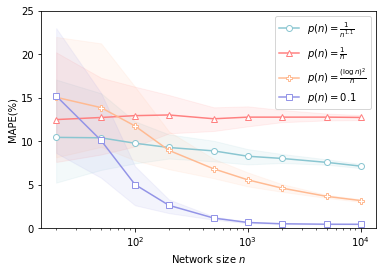

In [108]:
# size
plt.plot(l_n, df_MAPE_1_n11.mean(), c='#8ac6d1', marker='o', markerfacecolor='white', label='$p(n)=\\frac{1}{n^{1.1}}$')
plt.fill_between(l_n, df_MAPE_1_n11.quantile(0.05), df_MAPE_1_n11.quantile(0.95), color='#8ac6d1', alpha=0.1)
plt.plot(l_n, df_MAPE_1_n.mean(), c='#ff8080', marker='^', markerfacecolor='white', label='$p(n)=\\frac{1}{n}$')
plt.fill_between(l_n, df_MAPE_1_n.quantile(0.05), df_MAPE_1_n.quantile(0.95), color='#ff8080', alpha=0.1)
plt.plot(l_n, df_MAPE_logn2_n.mean(), c='#ffba92', marker='P', markerfacecolor='white', label='$p(n)=\\frac{(\\log n)^2}{n}$')
plt.fill_between(l_n, df_MAPE_logn2_n.quantile(0.05), df_MAPE_logn2_n.quantile(0.95), color='#ffba92', alpha=0.1)
plt.plot(l_n, df_MAPE_1.mean(), c='#9394e7', marker='s', markerfacecolor='white', label='$p(n)=0.1$')
plt.fill_between(l_n, df_MAPE_1.quantile(0.05), df_MAPE_1.quantile(0.95), color='#9394e7', alpha=0.1)
plt.xscale("log")
plt.legend()
plt.xlabel('Network size $n$')
plt.ylabel('MAPE(%)')
plt.ylim(0,25)
# tikzplotlib.save("size_MAPE.tex", axis_height='9cm', axis_width='12cm')

(-0.01, 0.95)

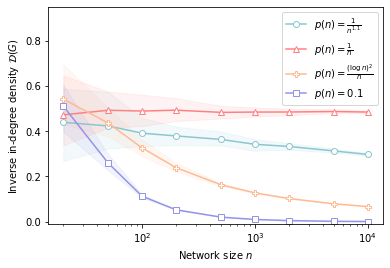

In [109]:
# size
plt.plot(l_n, df_inv_indeg_1_n11.mean(), c='#8ac6d1', marker='o', markerfacecolor='white', label='$p(n)=\\frac{1}{n^{1.1}}$')
plt.fill_between(l_n, df_inv_indeg_1_n11.quantile(0.05), df_inv_indeg_1_n11.quantile(0.95), color='#8ac6d1', alpha=0.1)
plt.plot(l_n, df_inv_indeg_1_n.mean(), c='#ff8080', marker='^', markerfacecolor='white', label='$p(n)=\\frac{1}{n}$')
plt.fill_between(l_n, df_inv_indeg_1_n.quantile(0.05), df_inv_indeg_1_n.quantile(0.95), color='#ff8080', alpha=0.1)
plt.plot(l_n, df_inv_indeg_logn2_n.mean(), c='#ffba92', marker='P', markerfacecolor='white', label='$p(n)=\\frac{(\\log n)^2}{n}$')
plt.fill_between(l_n, df_inv_indeg_logn2_n.quantile(0.05), df_inv_indeg_logn2_n.quantile(0.95), color='#ffba92', alpha=0.1)
plt.plot(l_n, df_inv_indeg_1.mean(), c='#9394e7', marker='s', markerfacecolor='white', label='$p(n)=0.1$')
plt.fill_between(l_n, df_inv_indeg_1.quantile(0.05), df_inv_indeg_1.quantile(0.95), color='#9394e7', alpha=0.1)
plt.xscale("log")
plt.legend()
plt.xlabel('Network size $n$')
plt.ylabel('Inverse in-degree density $\mathcal{D}(G)$')
plt.ylim(-0.01,0.95)
# tikzplotlib.save("size_MIID.tex", axis_height='9cm', axis_width='12cm')

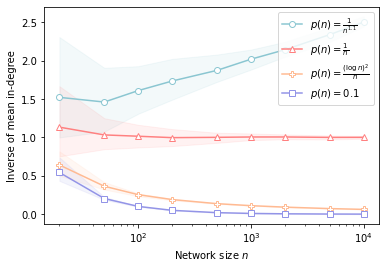

In [11]:
# size
plt.plot(l_n, (1/df_indeg_1_n11).mean(), c='#8ac6d1', marker='o', markerfacecolor='white', label='$p(n)=\\frac{1}{n^{1.1}}$')
plt.fill_between(l_n, (1/df_indeg_1_n11).quantile(0.05), (1/df_indeg_1_n11).quantile(0.95), color='#8ac6d1', alpha=0.1)
plt.plot(l_n, (1/df_indeg_1_n).mean(), c='#ff8080', marker='^', markerfacecolor='white', label='$p(n)=\\frac{1}{n}$')
plt.fill_between(l_n, (1/df_indeg_1_n).quantile(0.05), (1/df_indeg_1_n).quantile(0.95), color='#ff8080', alpha=0.1)
plt.plot(l_n, (1/df_indeg_logn2_n).mean(), c='#ffba92', marker='P', markerfacecolor='white', label='$p(n)=\\frac{(\\log n)^2}{n}$')
plt.fill_between(l_n, (1/df_indeg_logn2_n).quantile(0.05), (1/df_indeg_logn2_n).quantile(0.95), color='#ffba92', alpha=0.1)
plt.plot(l_n, (1/df_indeg_1).mean(), c='#9394e7', marker='s', markerfacecolor='white', label='$p(n)=0.1$')
plt.fill_between(l_n, (1/df_indeg_1).quantile(0.05), (1/df_indeg_1).quantile(0.95), color='#9394e7', alpha=0.1)
plt.xscale("log")
# plt.yscale("log")
plt.legend()
plt.xlabel('Network size $n$')
plt.ylabel('Inverse of mean in-degree')
tikzplotlib.save("size_MID.tex", axis_height='9cm', axis_width='12cm')

In [3]:
p = '1_n'
l_n = [20,50,100,200,500,1000,2000,5000,10000]

rec_0, rec_1, rec_2, rec_5 = [], [], [], []
for n in l_n:
    df_n = pd.DataFrame({'in_degree':[0,1,2,5]})
    df_n = df_n.set_index('in_degree')
    for cnt in range(1,51):
        df_iter = pd.DataFrame()
        df_results = pd.read_csv(f'../instances/ER_{p}/n{n}_{cnt}/results.csv')
        df_iter['error'] = abs(df_results['sim']-df_results['fp'])/df_results['sim']*100
        df_edge = pd.read_csv(f'../instances/ER_{p}/n{n}_{cnt}/edge.csv')
        df_iter['in_degree'] = df_edge.groupby('to_node').count().astype(int)
        df_iter.loc[df_iter['in_degree']>=5,'in_degree'] = 5
        df_iter = df_iter.fillna(0)
        res = df_iter.groupby('in_degree').mean()
        df_n[cnt] = res
    rec_0.append(df_n.loc[0,:].values)
    rec_1.append(df_n.loc[1,:].values)
    rec_2.append(df_n.loc[2,:].values)
    rec_5.append(df_n.loc[5,:].values)
    

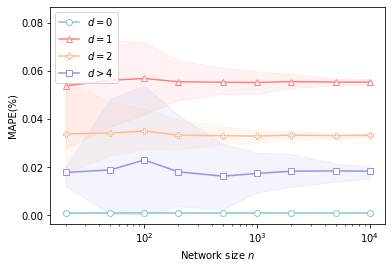

In [5]:
plt.plot(l_n, np.nanmean(rec_0,axis=1), c='#8ac6d1', marker='o', markerfacecolor='white', label='$d=0$')
plt.fill_between(l_n, np.nanquantile(rec_0,0.05,axis=1), np.nanquantile(rec_0,0.95,axis=1), color='#8ac6d1',alpha=0.1)
plt.plot(l_n, np.nanmean(rec_1,axis=1), c='#ff8080', marker='^', markerfacecolor='white', label='$d=1$')
plt.fill_between(l_n, np.nanquantile(rec_1,0.05,axis=1), np.nanquantile(rec_1,0.95,axis=1), color='#ff8080',alpha=0.1)
plt.plot(l_n, np.nanmean(rec_2,axis=1), c='#ffba92', marker='P', markerfacecolor='white', label='$d=2$')
plt.fill_between(l_n, np.nanquantile(rec_2,0.05,axis=1), np.nanquantile(rec_2,0.95,axis=1), color='#ffba92',alpha=0.1)
plt.plot(l_n, np.nanmean(rec_5,axis=1), c='#9394e7', marker='s', markerfacecolor='white', label='$d>4$')
plt.fill_between(l_n, np.nanquantile(rec_5,0.05,axis=1), np.nanquantile(rec_5,0.95,axis=1), color='#9394e7',alpha=0.1)
plt.xscale("log")
plt.xlabel('Network size $n$')
plt.ylabel('MAPE(%)')
# plt.ylim(-1,40)
plt.legend()
# tikzplotlib.save("lowdeg_size.tex", axis_height='9cm', axis_width='12cm')

In [6]:
def extract_density_info(n, l_p):
    df_MAPE, df_inv_indeg, df_indeg = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    for p in l_p:
        l_MAPE, l_inv_indeg, l_indeg = [],[],[]
        for cnt in range(1,51):
            df = pd.read_csv(f'../instances/ER_{p}/n{n}_{cnt}/results.csv')
            MAPE = np.mean(abs(df['sim']-df['fp'])/df['sim'])*100
            l_MAPE.append(MAPE)
            
            df = pd.read_csv(f'../instances/ER_{p}/n{n}_{cnt}/metrics.csv')
            l_inv_indeg.append(df['inv_ind_density'].values[0])
            l_indeg.append(df['d_mean'].values[0])
            
        df_MAPE[p], df_inv_indeg[p], df_indeg[p]  = l_MAPE, l_inv_indeg, l_indeg
    return df_MAPE, df_inv_indeg, df_indeg

In [7]:
l_p = ['1_n13', '1_n11', '1_n', 'sqrtlogn_n', 'logn_n', 'logn2_n', '1']
df_MAPE, df_inv_indeg, df_indeg = extract_density_info(1000, l_p)

([<matplotlib.axis.XTick at 0x7fcbf4518410>,
 [Text(1, 0, '$\\frac{1}{n^{1.3}}$'),
  Text(2, 0, '$\\frac{1}{n^{1.1}}$'),
  Text(3, 0, '$\\frac{1}{n}$'),
  Text(4, 0, '$\\frac{\\sqrt{\\log{n}}}{n}$'),
  Text(5, 0, '$\\frac{\\log{n}}{n}$'),
  Text(6, 0, '$\\frac{(\\log{n})^2}{n}$'),
  Text(7, 0, '$0.1$')])

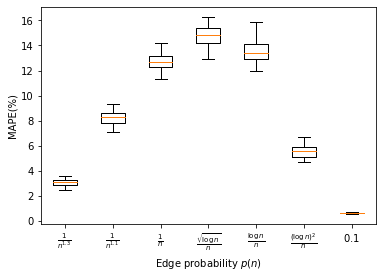

In [113]:
plt.boxplot(df_MAPE.values)
plt.xlabel('Edge probability $p(n)$')
plt.ylabel('MAPE(%)')
plt.xticks([1,2,3,4,5,6,7],['$\\frac{1}{n^{1.3}}$', '$\\frac{1}{n^{1.1}}$', '$\\frac{1}{n}$', '$\\frac{\\sqrt{\\log{n}}}{n}$', '$\\frac{\\log{n}}{n}$','$\\frac{(\\log{n})^2}{n}$', '$0.1$'])
# tikzplotlib.save("density_MAPE.tex", axis_height='9cm', axis_width='12cm')

([<matplotlib.axis.XTick at 0x7fcbf6919fd0>,
 [Text(1, 0, '$\\frac{1}{n^{1.3}}$'),
  Text(2, 0, '$\\frac{1}{n^{1.1}}$'),
  Text(3, 0, '$\\frac{1}{n}$'),
  Text(4, 0, '$\\frac{\\sqrt{\\log{n}}}{n}$'),
  Text(5, 0, '$\\frac{\\log{n}}{n}$'),
  Text(6, 0, '$\\frac{(\\log{n})^2}{n}$'),
  Text(7, 0, '$0.1$')])

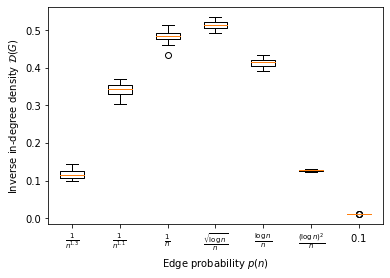

In [114]:
plt.boxplot(df_inv_indeg.values)
plt.xlabel('Edge probability $p(n)$')
plt.ylabel('Inverse in-degree density $\mathcal{D}(G)$')
plt.xticks([1,2,3,4,5,6,7],['$\\frac{1}{n^{1.3}}$', '$\\frac{1}{n^{1.1}}$', '$\\frac{1}{n}$', '$\\frac{\\sqrt{\\log{n}}}{n}$', '$\\frac{\\log{n}}{n}$','$\\frac{(\\log{n})^2}{n}$', '$0.1$'])
# tikzplotlib.save("density_MIID.tex", axis_height='9cm', axis_width='12cm')

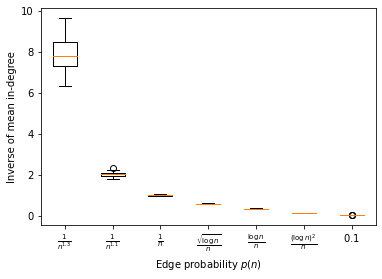

In [10]:
plt.boxplot((1/df_indeg).values)
plt.xlabel('Edge probability $p(n)$')
plt.ylabel('Inverse of mean in-degree')
plt.xticks([1,2,3,4,5,6,7],['$\\frac{1}{n^{1.3}}$', '$\\frac{1}{n^{1.1}}$', '$\\frac{1}{n}$', '$\\frac{\\sqrt{\\log{n}}}{n}$', '$\\frac{\\log{n}}{n}$','$\\frac{(\\log{n})^2}{n}$', '$0.1$'])
tikzplotlib.save("density_MID.tex", axis_height='9cm', axis_width='12cm')

In [6]:
def return_isnan(a):
    is_nan = np.isnan(a)
    return a[~is_nan]

In [7]:
def setBoxColors(bp, c):
    plt.setp(bp['boxes'], color=c)
    plt.setp(bp['caps'], color=c)
    plt.setp(bp['whiskers'], color=c)
    plt.setp(bp['fliers'], color=c, markeredgecolor=c)
    plt.setp(bp['medians'], color=c)


In [8]:
n = 1000
l_p = ['1_n13', '1_n11', '1_n', 'sqrtlogn_n', 'logn_n', 'logn2_n', '1']

rec_0, rec_1, rec_2, rec_5 = [], [], [], []
for p in l_p:
    rec_adoption = []
    df_p = pd.DataFrame({'in_degree':[0,1,2,5]})
    df_p = df_p.set_index('in_degree')
    for cnt in range(1,51):
        df_iter = pd.DataFrame()
        df_results = pd.read_csv(f'../instances/ER_{p}/n{n}_{cnt}/results.csv')
        rec_adoption.append(df_results['sim'].sum()/n)
        df_iter['error'] = abs(df_results['sim']-df_results['fp'])/df_results['sim']*100
        df_edge = pd.read_csv(f'../instances/ER_{p}/n{n}_{cnt}/edge.csv')
        df_iter['in_degree'] = df_edge.groupby('to_node').count().astype(int)
        df_iter.loc[df_iter['in_degree']>=5,'in_degree'] = 5
        df_iter = df_iter.fillna(0)
        res = df_iter.groupby('in_degree').mean()
        df_p[cnt] = res
    rec_0.append(return_isnan(df_p.loc[0,:].values))
    rec_1.append(return_isnan(df_p.loc[1,:].values))
    rec_2.append(return_isnan(df_p.loc[2,:].values))
    rec_5.append(return_isnan(df_p.loc[5,:].values))
    

([<matplotlib.axis.XTick at 0x7fd7f7fef8d0>,
 [Text(3, 0, '$\\frac{1}{n^{1.3}}$'),
  Text(6, 0, '$\\frac{1}{n^{1.1}}$'),
  Text(9, 0, '$\\frac{1}{n}$'),
  Text(12, 0, '$\\frac{\\sqrt{\\log{n}}}{n}$'),
  Text(15, 0, '$\\frac{\\log{n}}{n}$'),
  Text(18, 0, '$\\frac{(\\log{n})^2}{n}$'),
  Text(21, 0, '$0.1$')])

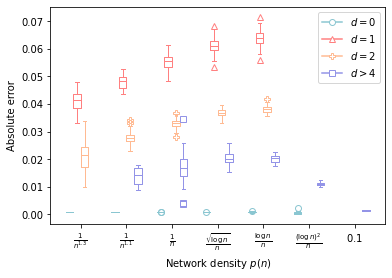

In [20]:
l_xticks = np.array([3,6,9,12,15,18,21])
bp_0 = plt.boxplot(rec_0, positions=l_xticks-0.75, sym='o')
setBoxColors(bp_0, '#8ac6d1')
bp_1 = plt.boxplot(rec_1[:-2], positions=l_xticks[:-2]-0.25, sym='^')
setBoxColors(bp_1, '#ff8080')
bp_2 = plt.boxplot(rec_2[:-2], positions=l_xticks[:-2]+0.25, sym='P')
setBoxColors(bp_2, '#ffba92')
bp_5 = plt.boxplot(rec_5, positions=l_xticks+0.75, sym='s')
setBoxColors(bp_5, '#9394e7')
plt.plot([0],[0], c='#8ac6d1',label='$d=0$', marker='o', markerfacecolor='white')
plt.plot([0],[0], c='#ff8080',label='$d=1$', marker='^', markerfacecolor='white')
plt.plot([0],[0], c='#ffba92',label='$d=2$', marker='P', markerfacecolor='white')
plt.plot([0],[0], c='#9394e7',label='$d>4$', marker='s', markerfacecolor='white')
plt.xlim(1,23)
# plt.ylim(-1,40)
plt.xlabel('Network density $p(n)$')
plt.ylabel('Absolute error')
plt.legend()
plt.xticks(l_xticks,['$\\frac{1}{n^{1.3}}$', '$\\frac{1}{n^{1.1}}$', '$\\frac{1}{n}$', '$\\frac{\\sqrt{\\log{n}}}{n}$', '$\\frac{\\log{n}}{n}$', '$\\frac{(\\log{n})^2}{n}$', '$0.1$'])
# tikzplotlib.save("lowdeg_density.tex", axis_height='9cm', axis_width='12cm')

In [21]:
n = 1000
l_p = ['1_n13', '1_n11', '1_n', 'sqrtlogn_n', 'logn_n', 'logn2_n', '1']

rec_0, rec_1, rec_2, rec_5 = [], [], [], []
for p in l_p:
    rec_adoption = []
    df_p = pd.DataFrame({'in_degree':[0,1,2,5]})
    df_p = df_p.set_index('in_degree')
    for cnt in range(1,51):
        df_iter = pd.DataFrame()
        beta, s = 3.5, 1
        params = {'sim_id':f'example', 'alpha':0.1, 'beta':beta,
                  'noise_dist': 'logistic', 'noise_dist_param': s,
                  'cnt_iter': 100000, 't_warmup':1000, 'is_traj':False, 
                  'is_network_given':True, 'network_dir':f'../instances/ER_{p}/n{n}_{cnt}/edge.csv',  
                  'is_value_given':True, 'value_dir':f'../instances/ER_{p}/n{n}_{cnt}/v.csv'
                 }

        G = network(params)
        sample = diffusion_simulation(G,params)
        L = 1/(4*s)
        rho = beta * L

        normalized_centrality = (1-rho)*la.inv(np.identity(sample.G.n)-rho*sample.G.A) @ sample.G.b
        df_iter['centrality'] = normalized_centrality
        
        df_edge = pd.read_csv(f'../instances/ER_{p}/n{n}_{cnt}/edge.csv')
        df_iter['in_degree'] = df_edge.groupby('to_node').count().astype(int)
        df_iter.loc[df_iter['in_degree']>=5,'in_degree'] = 5
        df_iter = df_iter.fillna(0)
        res = df_iter.groupby('in_degree').mean()
        df_p[cnt] = res
    rec_0.append(return_isnan(df_p.loc[0,:].values))
    rec_1.append(return_isnan(df_p.loc[1,:].values))
    rec_2.append(return_isnan(df_p.loc[2,:].values))
    rec_5.append(return_isnan(df_p.loc[5,:].values))
    

Instance generated with 999 nodes.
Instance generated with 999 nodes.
Instance generated with 997 nodes.
Instance generated with 989 nodes.
Instance generated with 1000 nodes.
Instance generated with 998 nodes.
Instance generated with 997 nodes.
Instance generated with 1000 nodes.
Instance generated with 999 nodes.
Instance generated with 998 nodes.
Instance generated with 1000 nodes.
Instance generated with 997 nodes.
Instance generated with 995 nodes.
Instance generated with 997 nodes.
Instance generated with 998 nodes.
Instance generated with 999 nodes.
Instance generated with 997 nodes.
Instance generated with 999 nodes.
Instance generated with 999 nodes.
Instance generated with 1000 nodes.
Instance generated with 991 nodes.
Instance generated with 996 nodes.
Instance generated with 997 nodes.
Instance generated with 998 nodes.
Instance generated with 997 nodes.
Instance generated with 993 nodes.
Instance generated with 999 nodes.
Instance generated with 1000 nodes.
Instance genera

Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000 nodes.
Instance generated with 1000

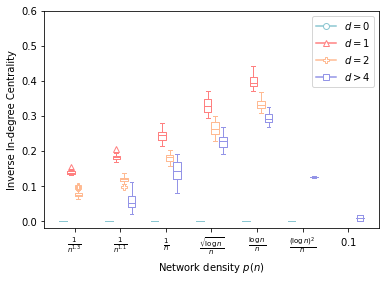

In [22]:
l_xticks = np.array([3,6,9,12,15,18,21])
bp_0 = plt.boxplot(rec_0, positions=l_xticks-0.75, sym='o')
setBoxColors(bp_0, '#8ac6d1')
bp_1 = plt.boxplot(rec_1[:-2], positions=l_xticks[:-2]-0.25, sym='^')
setBoxColors(bp_1, '#ff8080')
bp_2 = plt.boxplot(rec_2[:-2], positions=l_xticks[:-2]+0.25, sym='P')
setBoxColors(bp_2, '#ffba92')
bp_5 = plt.boxplot(rec_5, positions=l_xticks+0.75, sym='s')
setBoxColors(bp_5, '#9394e7')
plt.plot([0],[0], c='#8ac6d1',label='$d=0$', marker='o', markerfacecolor='white')
plt.plot([0],[0], c='#ff8080',label='$d=1$', marker='^', markerfacecolor='white')
plt.plot([0],[0], c='#ffba92',label='$d=2$', marker='P', markerfacecolor='white')
plt.plot([0],[0], c='#9394e7',label='$d>4$', marker='s', markerfacecolor='white')
plt.xlim(1,23)
plt.ylim(-0.02,0.6)
plt.xlabel('Network density $p(n)$')
plt.ylabel('Inverse In-degree Centrality')
plt.legend()
plt.xticks(l_xticks,['$\\frac{1}{n^{1.3}}$', '$\\frac{1}{n^{1.1}}$', '$\\frac{1}{n}$', '$\\frac{\\sqrt{\\log{n}}}{n}$', '$\\frac{\\log{n}}{n}$', '$\\frac{(\\log{n})^2}{n}$', '$0.1$'])
tikzplotlib.save("lowdeg_centrality.tex", axis_height='9cm', axis_width='12cm')

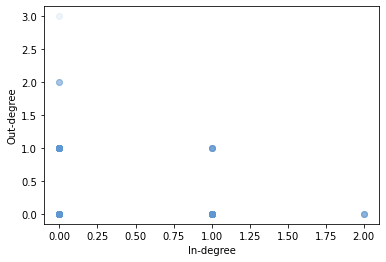

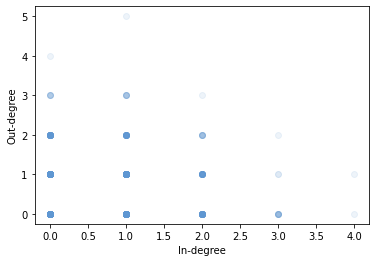

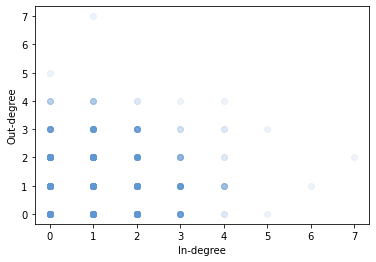

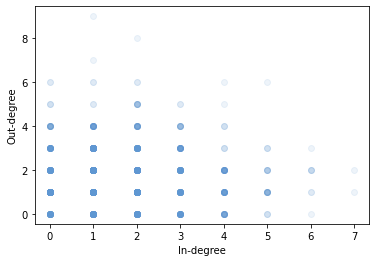

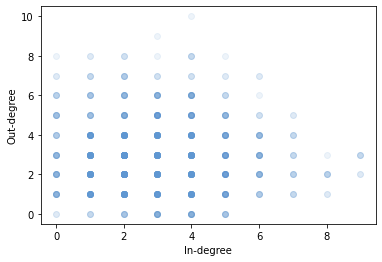

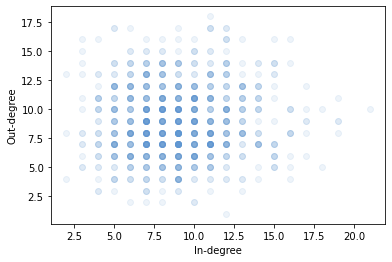

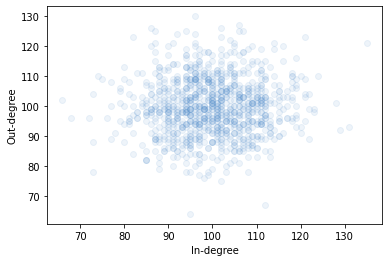

In [31]:
n, cnt = 1000, 1
l_p = ['1_n13', '1_n11', '1_n', 'sqrtlogn_n', 'logn_n', 'logn2_n', '1' ]
for p in l_p:
    df_edge = pd.read_csv(f'../instances/ER_{p}/n{n}_{cnt}/edge.csv')
    df = pd.DataFrame({'from_node':np.arange(0,n,1)})
    df = df.set_index('from_node')
    df['out'] = df_edge.groupby('from_node').count()
    df['in'] = df_edge.groupby('to_node').count()
    df = df.fillna(0)
    plt.scatter(df['in'],df['out'],c='#5f97d2',alpha=0.1)
    plt.xlabel('In-degree')
    plt.ylabel('Out-degree')
    tikzplotlib.save(f"in_out_deg_{p}.tex", axis_height='9cm', axis_width='12cm')
    plt.show()

In [262]:
l_alpha = ['25', '30', '35']
l_theta = ['neg10', 'neg05', '0', 'pos05', 'pos10']
l_n = [20,50,100,200,500,1000,2000,5000,10000]

for alpha in ['30', '35']:
    for theta in ['0']:
        for n in l_n:
            for cnt in range(81,101):
                print_metrics(f'PL_alpha{alpha}_theta{theta}/n{n}_{cnt}')

Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 20 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance generated with 50 nodes.
Instance gener

Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 200 nodes.
Instance generated with 500 nodes.
Instance generated with 500 nodes.
Instance generated with 500 nodes.
Instance generated with 500 nodes.
Instance generated with 500 nodes.
Instance generated with 500 nodes.
Instance generated with 500 nodes.
Instance generated with 500 nodes.
Instance generated with 500 nodes.
Instance generated with 500 nodes.
Instance generated w

In [6]:
def extract_alpha_theta_info(l_n, alpha, theta, n_iter):
    df_MAPE, df_inv_indeg, df_indeg = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    for n in l_n:
        l_MAPE, l_inv_indeg, l_indeg = [],[],[]
        for cnt in range(1,n_iter+1):
            df = pd.read_csv(f'../instances/PL_alpha{alpha}_theta{theta}/n{n}_{cnt}/results.csv')
            MAPE = np.mean(abs(df['sim']-df['fp'])/df['sim'])*100
            l_MAPE.append(MAPE)
            
            df = pd.read_csv(f'../instances/PL_alpha{alpha}_theta{theta}/n{n}_{cnt}/metrics.csv')
            l_inv_indeg.append(df['inv_ind_density'].values[0])
            l_indeg.append(df['d_mean'].values[0])
            
        df_MAPE[n], df_inv_indeg[n], df_indeg[n]  = l_MAPE, l_inv_indeg, l_indeg
    return df_MAPE, df_inv_indeg, df_indeg

In [264]:
l_n = [20,50,100,200,500,1000,2000,5000,10000]
alpha, theta = '25', 'neg10'
df_MAPE_25_neg10, df_inv_indeg_25_neg10, df_indeg_25_neg10 = extract_alpha_theta_info(l_n, alpha, theta, 100)
alpha, theta = '25', 'neg05'
df_MAPE_25_neg05, df_inv_indeg_25_neg05, df_indeg_25_neg05 = extract_alpha_theta_info(l_n, alpha, theta, 100)
alpha, theta = '25', '0'
df_MAPE_25_0, df_inv_indeg_25_0, df_indeg_25_0 = extract_alpha_theta_info(l_n, alpha, theta, 100)
alpha, theta = '25', 'pos05'
df_MAPE_25_pos05, df_inv_indeg_25_pos05, df_indeg_25_pos05 = extract_alpha_theta_info(l_n, alpha, theta, 100)
alpha, theta = '25', 'pos10'
df_MAPE_25_pos10, df_inv_indeg_25_pos10, df_indeg_25_pos10 = extract_alpha_theta_info(l_n, alpha, theta, 100)

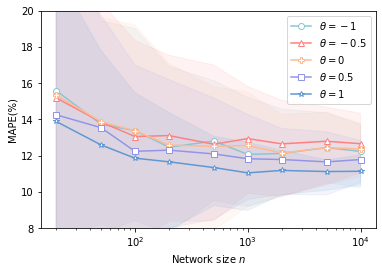

In [265]:
# size
plt.plot(l_n, df_MAPE_25_neg10.mean(), c='#8ac6d1', marker='o', markerfacecolor='white', label='$\\theta=-1$')
plt.fill_between(l_n, df_MAPE_25_neg10.quantile(0.05), df_MAPE_25_neg10.quantile(0.95), color='#8ac6d1', alpha=0.1)
plt.plot(l_n, df_MAPE_25_neg05.mean(), c='#ff8080', marker='^', markerfacecolor='white', label='$\\theta=-0.5$')
plt.fill_between(l_n, df_MAPE_25_neg05.quantile(0.05), df_MAPE_25_neg05.quantile(0.95), color='#ff8080', alpha=0.1)
plt.plot(l_n, df_MAPE_25_0.mean(), c='#ffba92', marker='P', markerfacecolor='white', label='$\\theta=0$')
plt.fill_between(l_n, df_MAPE_25_0.quantile(0.05), df_MAPE_25_0.quantile(0.95), color='#ffba92', alpha=0.1)
plt.plot(l_n, df_MAPE_25_pos05.mean(), c='#9394e7', marker='s', markerfacecolor='white', label='$\\theta=0.5$')
plt.fill_between(l_n, df_MAPE_25_pos05.quantile(0.05), df_MAPE_25_pos05.quantile(0.95), color='#9394e7', alpha=0.1)
plt.plot(l_n, df_MAPE_25_pos10.mean(), c='#5f97d2', marker='*', markerfacecolor='white', label='$\\theta=1$')
plt.fill_between(l_n, df_MAPE_25_pos10.quantile(0.05), df_MAPE_25_pos10.quantile(0.95), color='#5f97d2', alpha=0.1)

plt.xscale("log")
plt.legend()
plt.xlabel('Network size $n$')
plt.ylabel('MAPE(%)')
plt.ylim(8,20)
tikzplotlib.save("theta_MAPE.tex", axis_height='9cm', axis_width='12cm')

In [266]:
l_n = [20,50,100,200,500,1000,2000,5000,10000]
alpha, theta = '25', '0'
df_MAPE_25_0, df_inv_indeg_25_0, df_indeg_25_0 = extract_alpha_theta_info(l_n, alpha, theta, 100)
alpha, theta = '30', '0'
df_MAPE_30_0, df_inv_indeg_30_0, df_indeg_30_0 = extract_alpha_theta_info(l_n, alpha, theta, 100)
alpha, theta = '35', '0'
df_MAPE_35_0, df_inv_indeg_35_0, df_indeg_35_0 = extract_alpha_theta_info(l_n, alpha, theta, 100)

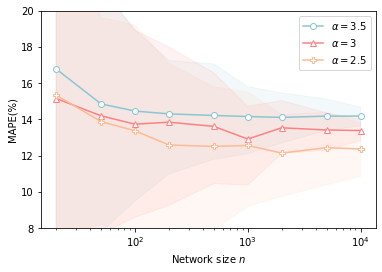

In [267]:
##### size
plt.plot(l_n, df_MAPE_35_0.mean(), c='#8ac6d1', marker='o', markerfacecolor='white', label='$\\alpha=3.5$')
plt.fill_between(l_n, df_MAPE_35_0.quantile(0.05), df_MAPE_35_0.quantile(0.95), color='#8ac6d1', alpha=0.1)
plt.plot(l_n, df_MAPE_30_0.mean(), c='#ff8080', marker='^', markerfacecolor='white', label='$\\alpha=3$')
plt.fill_between(l_n, df_MAPE_30_0.quantile(0.05), df_MAPE_30_0.quantile(0.95), color='#ff8080', alpha=0.1)
plt.plot(l_n, df_MAPE_25_0.mean(), c='#ffba92', marker='P', markerfacecolor='white', label='$\\alpha=2.5$')
plt.fill_between(l_n, df_MAPE_25_0.quantile(0.05), df_MAPE_25_0.quantile(0.95), color='#ffba92', alpha=0.1)
plt.xscale("log")
plt.legend()
plt.xlabel('Network size $n$')
plt.ylabel('MAPE(%)')
plt.ylim(8,20)
tikzplotlib.save("alpha_MAPE.tex", axis_height='9cm', axis_width='12cm')

In [25]:
alpha, theta = '25', '0'
l_n = [20,50,100,200,500,1000,2000,5000,10000]
l_d = np.arange(0,51,1)
for n in [10000]:
    df_n = pd.DataFrame({'in_degree':l_d})
    df_n = df_n.set_index('in_degree')
    df_cnt = pd.DataFrame({'in_degree':l_d})
    df_cnt = df_cnt.set_index('in_degree')
    df_frac = pd.DataFrame({'in_degree':l_d})
    df_frac = df_frac.set_index('in_degree')
    l_error = []
    for cnt in range(1,101):
        df_iter = pd.DataFrame()
        df_results = pd.read_csv(f'../instances/PL_alpha{alpha}_theta{theta}/n{n}_{cnt}/results.csv')
        df_iter['error'] = abs(df_results['sim']-df_results['fp'])/df_results['sim'] * 100
        l_error.append(df_iter['error'].mean())
        df_edge = pd.read_csv(f'../instances/PL_alpha{alpha}_theta{theta}/n{n}_{cnt}/edge.csv')
        df_iter['in_degree'] = df_edge.groupby('to_node').count().astype(int)
        df_iter = df_iter.fillna(0)
        df_n[cnt] = df_iter.groupby('in_degree').mean()
        df_cnt[cnt] = df_iter.groupby('in_degree').count()
        df_frac[cnt] = df_iter.groupby('in_degree').sum()/df_iter['error'].sum()


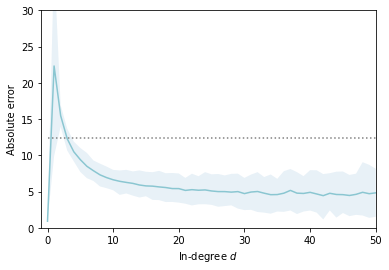

In [29]:
plt.plot(l_d, np.nanmean(df_n.values,axis=1), c='#8ac6d1')
plt.fill_between(l_d, np.nanquantile(df_n.values,0.05,axis=1), np.nanquantile(df_n.values,0.95,axis=1),alpha=0.1)
plt.plot([0,50],[np.mean(l_error), np.mean(l_error)], linestyle=':', c='gray')
plt.ylim(0,30)
plt.xlim(-1,50)
plt.xlabel('In-degree $d$')
plt.ylabel('MAPE(%)')
tikzplotlib.save("degree_ae.tex", axis_height='9cm', axis_width='12cm')

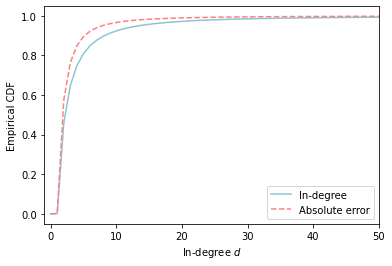

In [30]:
plt.plot(l_d, np.nancumsum(np.nanmean(df_cnt.values,axis=1))/10000, c='#8ac6d1', label='In-degree')
plt.plot(l_d, np.nancumsum(np.nanmean(df_frac.values,axis=1)), c='#ff8080', linestyle='--', label='MAPE')
plt.xlim(-1,50)
plt.legend()
plt.xlabel('In-degree $d$')
plt.ylabel('Empirical CDF')
tikzplotlib.save("degree_ecdf.tex", axis_height='9cm', axis_width='12cm')


In [329]:
l_network = ['caltech', 'reed', 'haverford', 'simmons', 'amherst']
for network in l_network:
    df = pd.read_csv(f'../instances/{network}/sim_time/results.csv')
    df_1 = pd.read_csv(f'../instances/{network}/sim_1/results.csv')
    df_t = pd.read_csv(f'../instances/{network}/sim_1/t.csv')
    t = np.mean(np.abs(df.T-df_1['sim'])/df_1['sim'],axis=1).values
    t_base = t[-1]
    ind = np.where(t<t_base)[0][0]
    print(df_t['sim'].values[0]/100000*1000*(ind+1),df_t['fp'].values[0])
    

4.533454163074493 0.06357049942016603
5.622820608615875 0.06226491928100586
23.234719524383543 0.10093235969543456
11.918456583023074 0.14257359504699707
35.67490299224853 0.1846153736114502


In [33]:
alpha, theta = 25, 'neg05'
l_n = [20,50,100,200,500,1000,2000,5000,10000]
l_theta = ['neg10', 'neg05', '0', 'pos05', 'pos10']
l_corr, l_r = [], []
for theta in l_theta:
    corr, r = [], []
    for n in l_n:
        for cnt in range(1,101):
            df_edge = pd.read_csv(f'../instances/PL_alpha{alpha}_theta{theta}/n{n}_{cnt}/edge.csv')
            df = pd.DataFrame({'from_node':np.arange(0,n,1)})
            df = df.set_index('from_node')
            df['out'] = df_edge.groupby('from_node').count()
            df['in'] = df_edge.groupby('to_node').count()
            corr.append(np.corrcoef(df['out'], df['in'])[0,1])
            r.append(np.max(df['out']/df['in']))
    l_corr.append(corr)
    l_r.append(r)


In [34]:
np.nanmean(l_corr,axis=1), np.nanmean(l_r,axis=1)

(array([-0.01548663, -0.10372606, -0.01591099,  0.48084746,  0.97580131]),
 array([124.01959259, 148.88140741, 116.96706261,  92.56544348,
         11.34240564]))

In [15]:
df_c = df.reset_index().groupby(['in','out']).count().reset_index()

In [19]:
a = np.zeros(shape=(df_c['in'].max()+1, df_c['out'].max()+1))
for cnt in df_c.index:
    d_in, d_out = df_c.loc[cnt,'in'], df_c.loc[cnt,'out']
    a[d_in, d_out] = df_c.loc[cnt,'from_node']

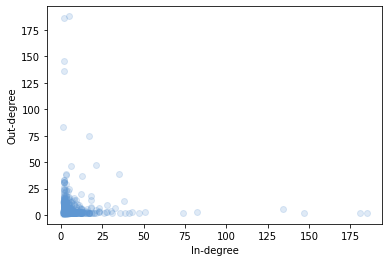

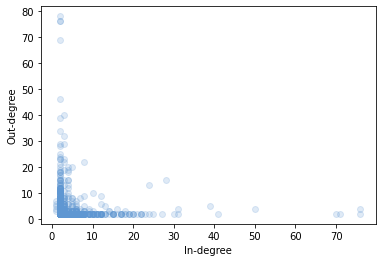

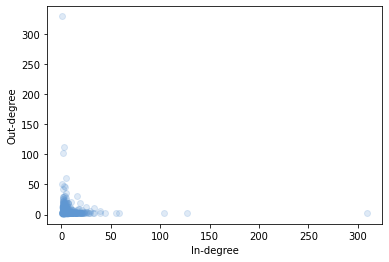

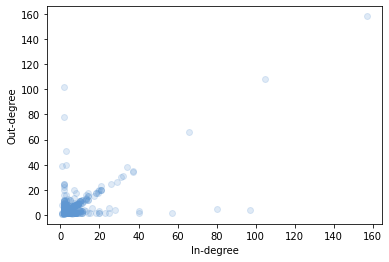

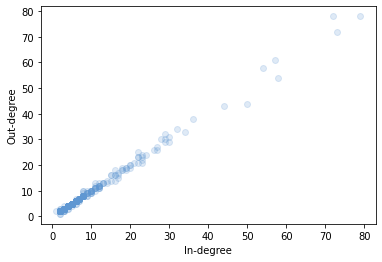

In [4]:
n, cnt = 1000, 1
alpha = 25
l_theta = ['neg10', 'neg05', '0', 'pos05', 'pos10']
for theta in l_theta:
    df_edge = pd.read_csv(f'../instances/PL_alpha{alpha}_theta{theta}/n{n}_{cnt}/edge.csv')
    df = pd.DataFrame({'from_node':np.arange(0,n,1)})
    df = df.set_index('from_node')
    df['out'] = df_edge.groupby('from_node').count()
    df['in'] = df_edge.groupby('to_node').count()
    df = df.fillna(0)
    plt.scatter(df['in'],df['out'],c='#5f97d2',alpha=0.2)
    plt.xlabel('In-degree')
    plt.ylabel('Out-degree')
    tikzplotlib.save(f"in_out_deg_{theta}.tex", axis_height='9cm', axis_width='12cm')
    plt.show()